# Plot all your data

A major drawback of histograms is that the same dataset can look different depending on the number of bins, this leads to binning bias. Binning bias is the same data may be interpreted differently depending on the choice of bins
 
Histograms don't plot ALL data, your actually sweeping data into bins and losing the actual values. To remedy this we can use a swarm plot. In order to plot a swarm plot the data needs to be in a data frame where each column is a feature of interest, and each row is an observation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# Import your data
df_swing = pd.read_csv('swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


#### Example of Binning bias

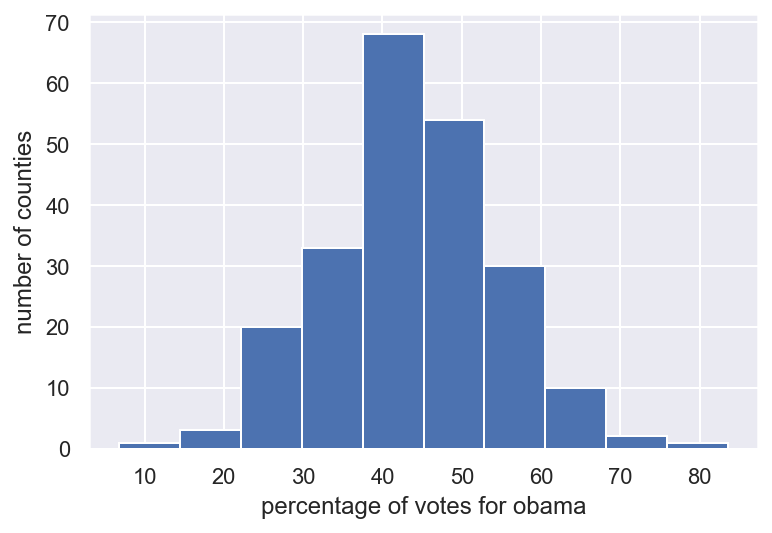

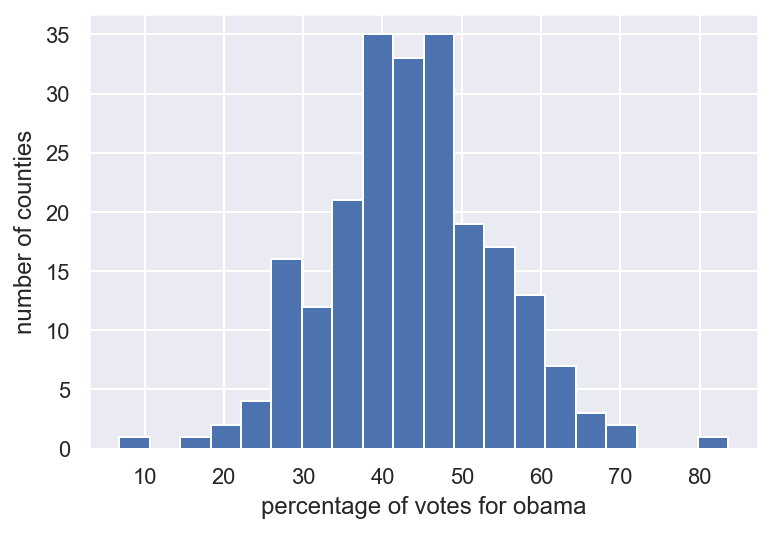

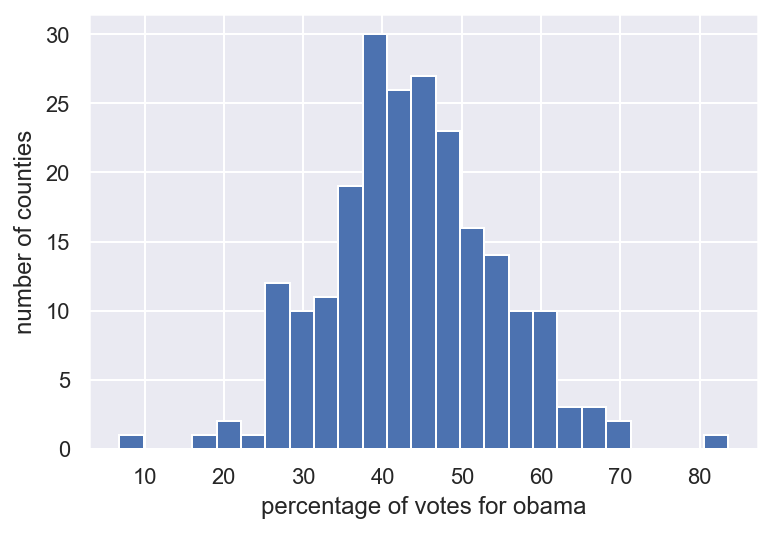

In [3]:
plt.hist(df_swing['dem_share'])
plt.xlabel('percentage of votes for obama')
plt.ylabel('number of counties')
plt.show();

sns.set()
plt.hist(df_swing['dem_share'], bins=20)
plt.xlabel('percentage of votes for obama')
plt.ylabel('number of counties')
plt.show();

sns.set()
plt.hist(df_swing['dem_share'], bins=25)
plt.xlabel('percentage of votes for obama')
plt.ylabel('number of counties')
plt.show();

### Swarm plot

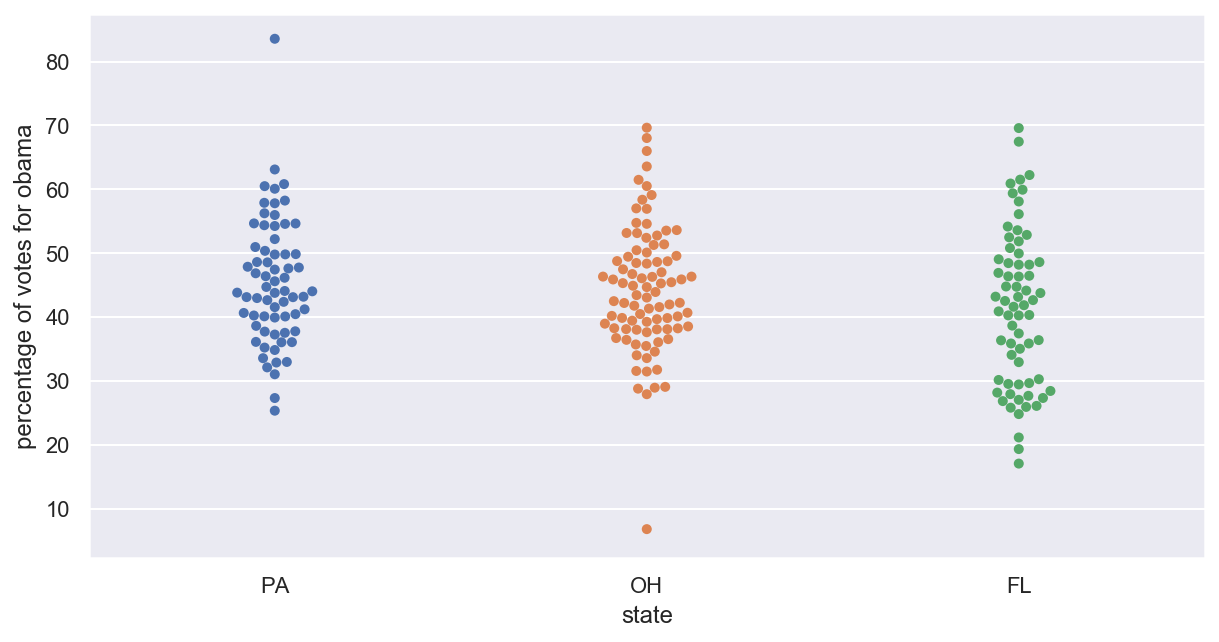

In [4]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percentage of votes for obama')
plt.show();

# Empirical cumulative distribution function (ECDF)

#### An X-value of an ECDF is the quantity you are measuring

#### The Y-value is the function of data points that have a value smaller than the corresponding x-value

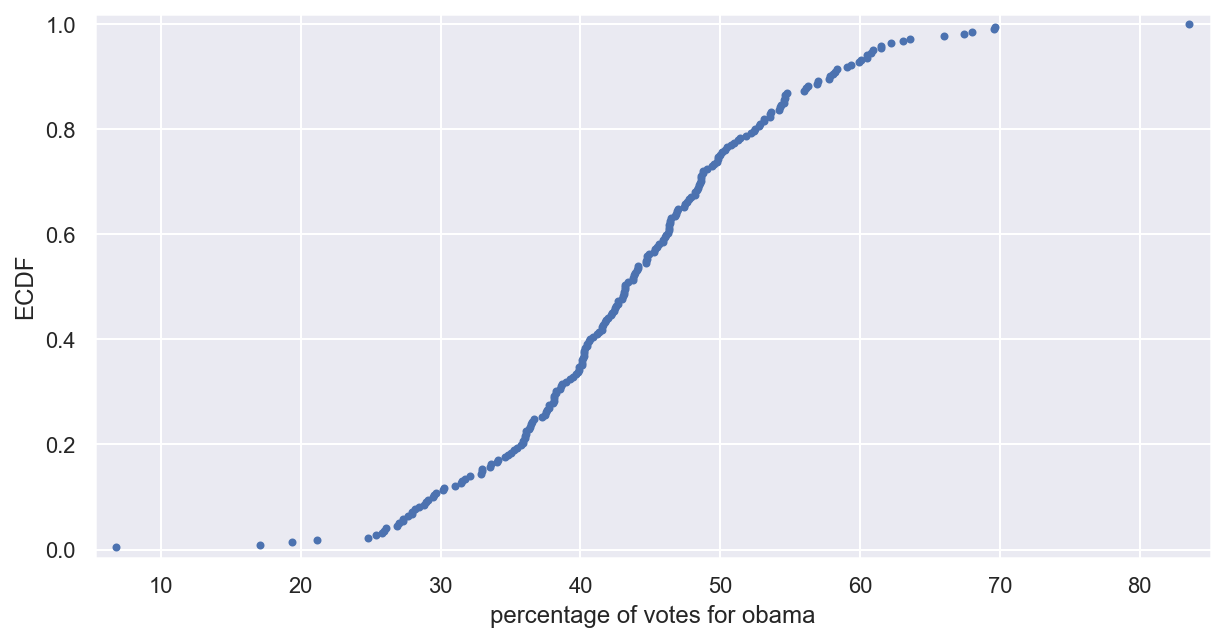

In [5]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x) + 1) / len(x)
plt.figure(figsize=(10,5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percentage of votes for obama')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show();

In [6]:
# Computing the ECDF by writing your own function
df_iris = pd.read_csv('iris_data.csv')

def ecdf(df_iris):
    """Compute ECDF for a one-dimensional array of measurements"""
    # Number of data points: n
    n = len(df_iris)
    # X-data for ECDF: x
    x = np.sort(df_iris)
    # Y-data for ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


#### Plot your ECDF
You will need to unpack your arrays, since the function returns 2

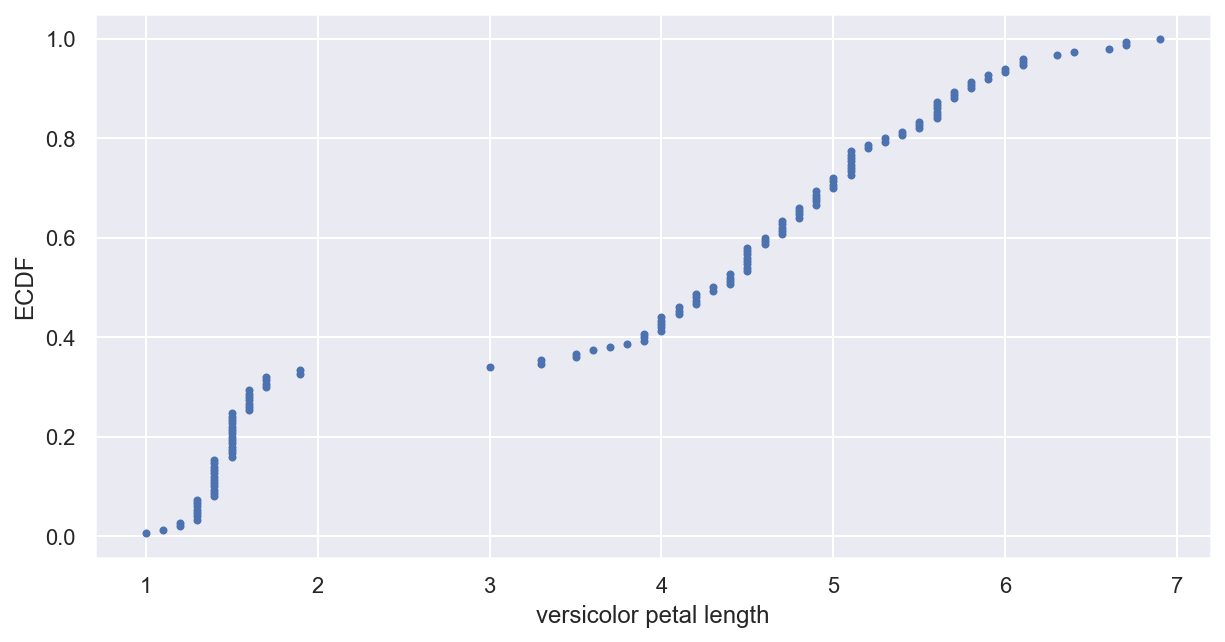

In [7]:
x_vers, y_vers = ecdf(df_iris['petal length(cm)'])
plt.figure(figsize=(10,5))
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.xlabel('versicolor petal length')
plt.ylabel('ECDF')
plt.show();

### Box and whisker plot

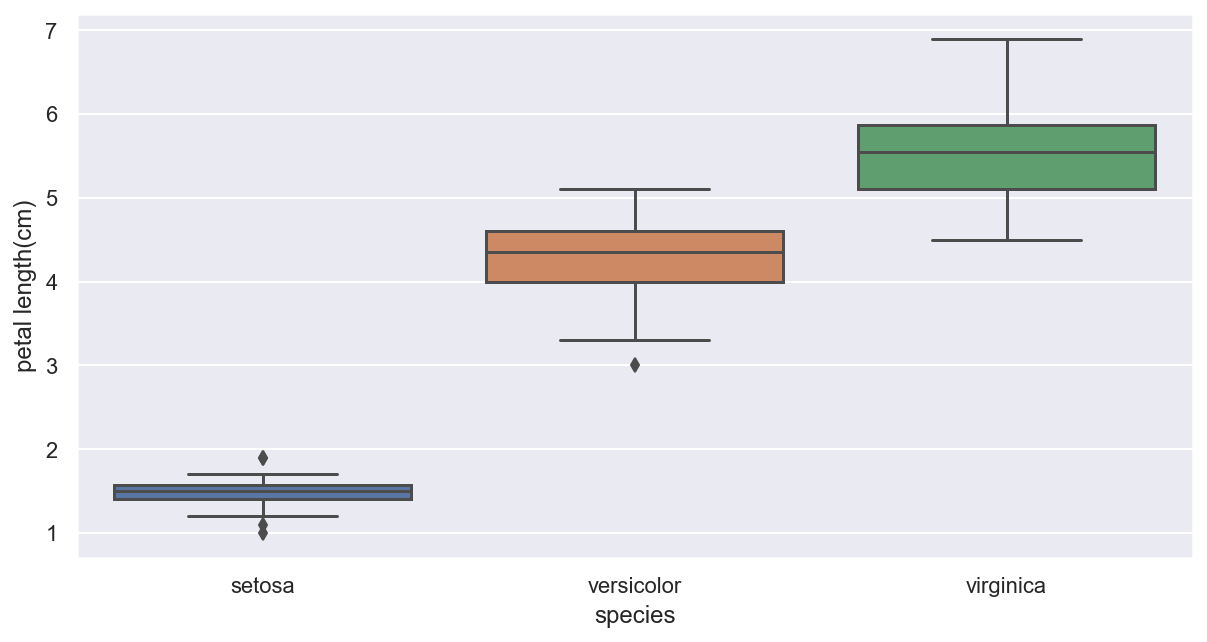

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='species', y='petal length(cm)', data=df_iris)
plt.xlabel('species')
plt.ylabel('petal length(cm)')
plt.show()

### Scatter plot

In [9]:
import pandas as pd
df_swing = pd.read_csv('swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


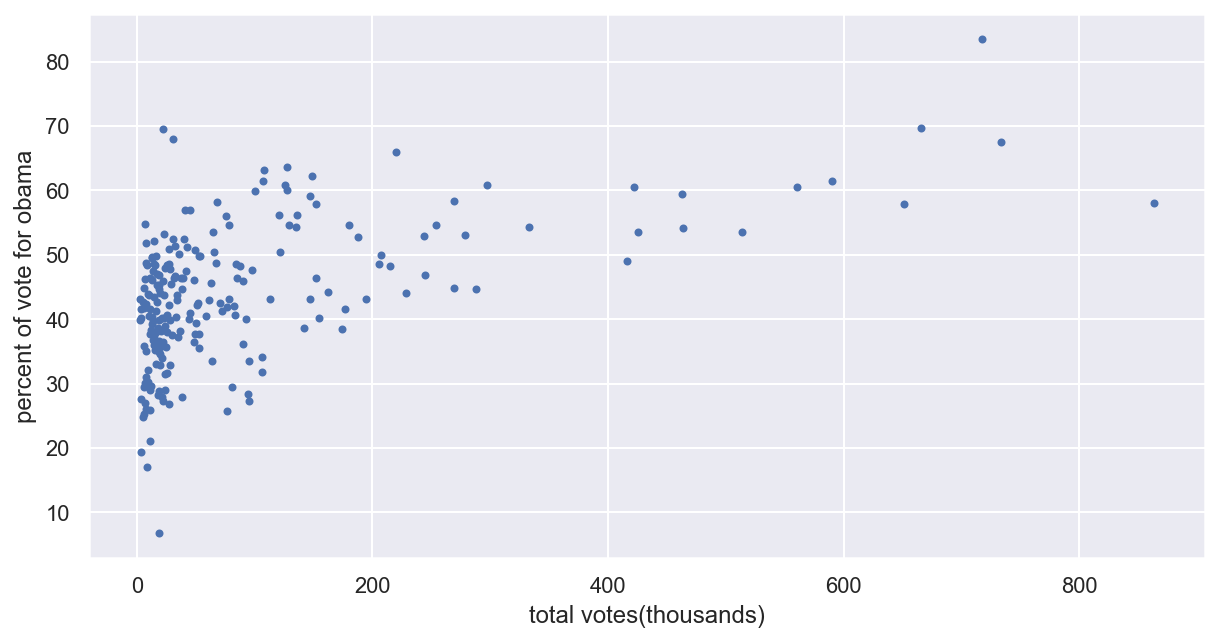

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df_swing['total_votes']/1000, df_swing['dem_share'], marker='.', linestyle='none')
plt.xlabel('total votes(thousands)')
plt.ylabel('percent of vote for obama')
plt.show()

# Computing the Covariance and Pearson Correlation Coefficient 

Covariance: The measure of how 2 quantities vary together 

In [11]:
covariance_matrix = np.cov(df_iris['petal length(cm)'], df_iris['petal width(cm)'])
print(covariance_matrix)

# Extract covariance of length and width of petals
petal_cov = covariance_matrix[0,1]
print(petal_cov)

[[3.11317942 1.29638747]
 [1.29638747 0.58241432]]
1.2963874720357944


Pearson Correlation Coefficient: The comparision of the variability in the data due to codependence (covariance) to the variability inherit to each variable independently (standard deviation)

In [12]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]


r = pearson_r(df_iris['petal length(cm)'], df_iris['petal width(cm)'])
print(r)

0.9627570970509663


# Random number generators and hacker statistics 

Simulating 4 coin filps:
What's the probability of getting four heads if we were to repeat the four flips over and over again?

In [13]:
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [14]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [15]:
np.sum(heads)

1

In [16]:
# Initialize number of 4 heads trials

n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0619

## Bernoulli trial function

In [17]:
def perform_bernoulli_trials(n, p):

    # Perform n bernoulli trials with success probability p and return number of successes

    n_success = 0

    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1

    return n_success

Using the function above - A bank makes 100 mortgage loans, what is the probability(p) of getting a given number of defaults given that p = 0.05

In [18]:
n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

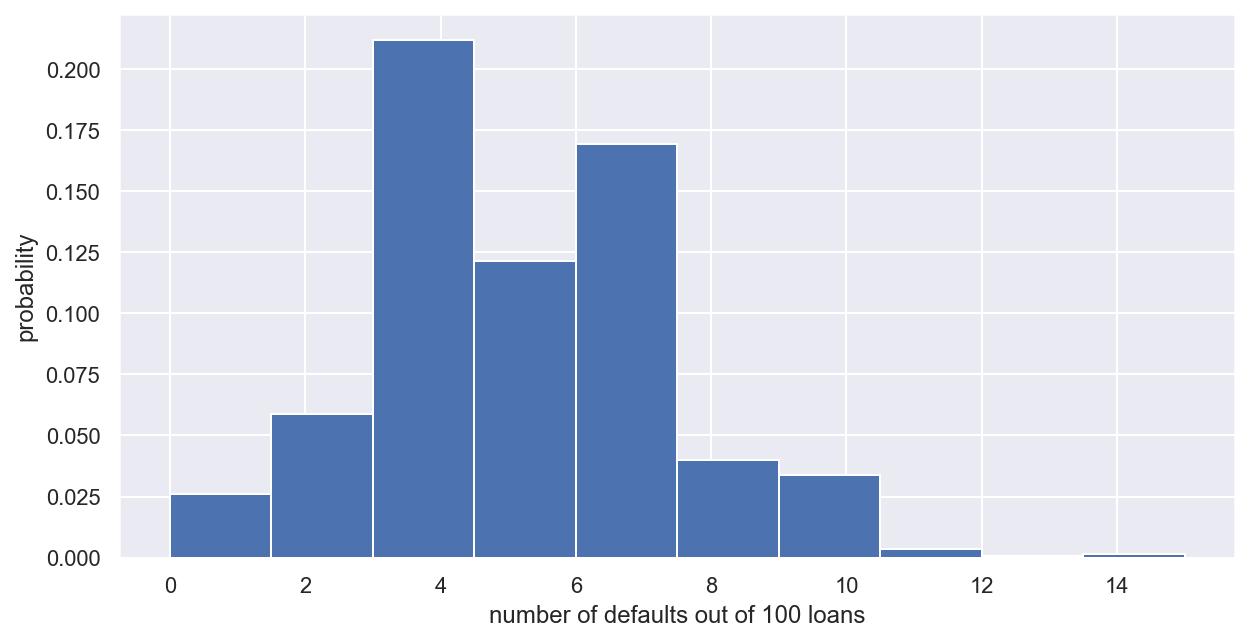

In [19]:
plt.figure(figsize=(10,5))
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')
plt.show();

If interest rates are such that the bank will lose money IF 10 or more of its loans are defaulted on, what is the probability that the bank will lose money?

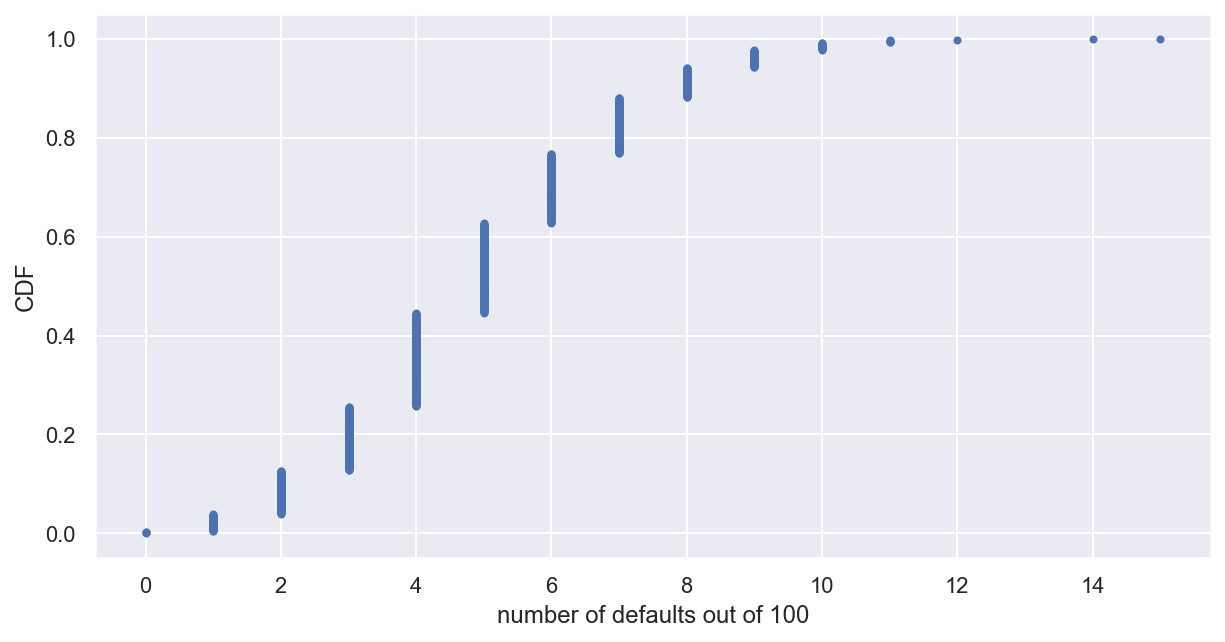

In [20]:
x, y = ecdf(n_defaults)

plt.figure(figsize=(10,5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100')
plt.ylabel('CDF')
plt.show();

In [21]:
n_lose_money = np.sum(n_defaults >= 10)
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.023


# Probability distributions

### Binomial Distributions
Instead of using our perform_bernoulli_trials() function, we will use the np.random.binomial() function. This is far more computationally efficient 

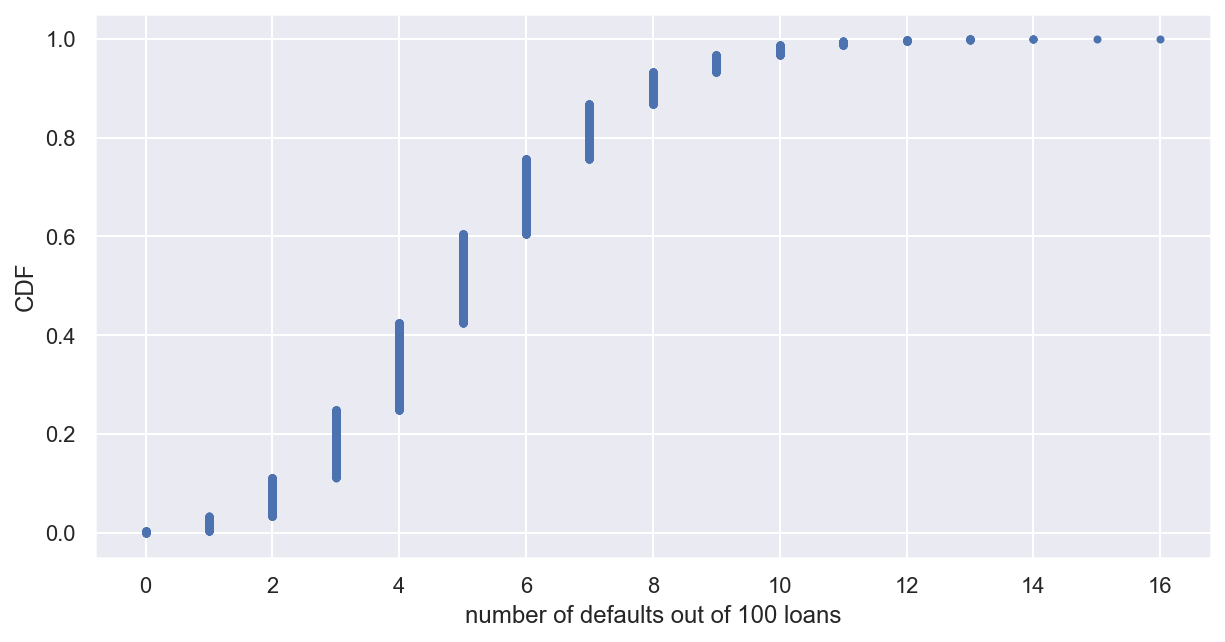

In [22]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

x, y = ecdf(n_defaults)

plt.figure(figsize=(10,5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

plt.show();

Plotting the PMF of the Binomial distribution as a histogram
*We want the bins centered on the integers*

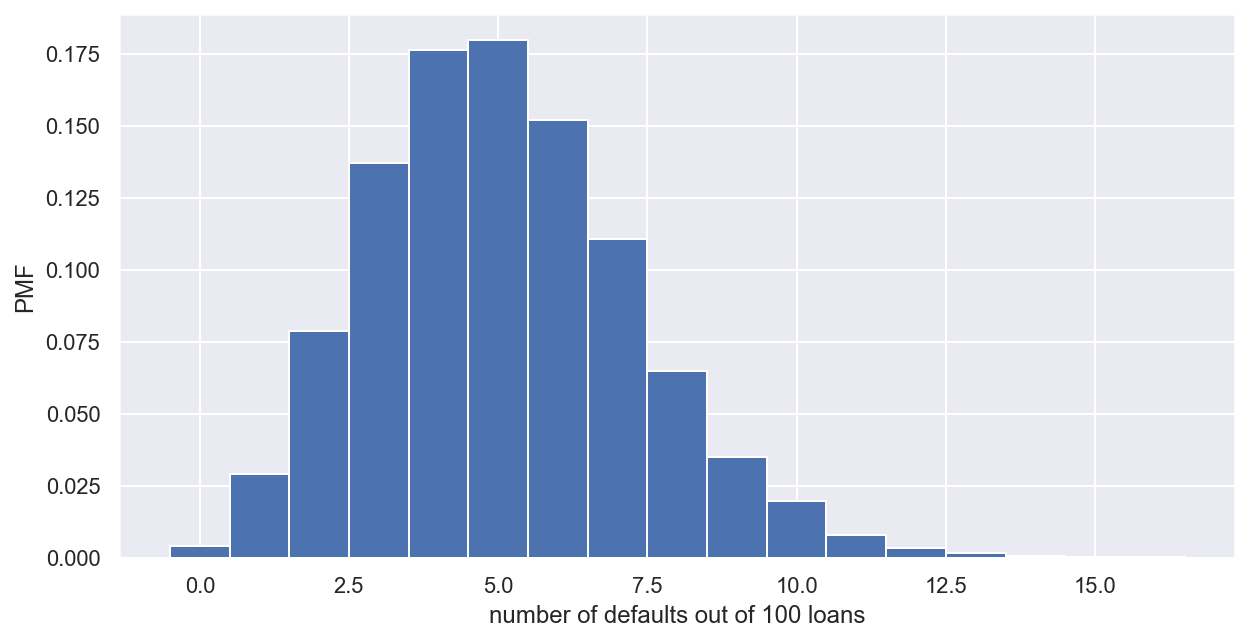

In [23]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

plt.figure(figsize=(10,5))
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')
plt.show();

## Poisson Processes and Poisson Distribution

Poisson Process: The timing of the next event is completely independent of when the previous event happened

Poisson Distribution: The number r of arrivals of a Poisson process in a given time interval with an average rate of ___ arrivals per interval 

#### The Poisson distribution is the limit of the Binomial distribution for low probability of success and a large number of trials

In [24]:
# Draw 10,000 samples out of Poisson distribution
samples_poisson = np.random.poisson(10, size=10000)

print('Poisson: ', np.mean(samples_poisson),
      np.std(samples_poisson))

# Specify values of n and p to consider for Binomial
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each pair
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    
    print('n =', n[i], 'Binom:' , np.mean(samples_binomial),
         np.std(samples_binomial))


Poisson:  9.997 3.163698942693505
n = 20 Binom: 10.0011 2.2373419027944745
n = 100 Binom: 10.0414 2.992137369841164
n = 1000 Binom: 9.948 3.147998729351713


In [25]:
# Draw 10,000 samples out of Poisson distribution
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are 7 or greater
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting 7 or more
p_large = n_large / 10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0064


## Probability density functions

Continuous analog to the PMF

Mathematical description of the relative likelihood of observing a value of a continuous variable 

# Normal Distribution

Describes a continuous variable who's PDF has a single symmetric peak

The mean determines where the center of the peak is, and the standard deviation is a measure of how wide the peak is

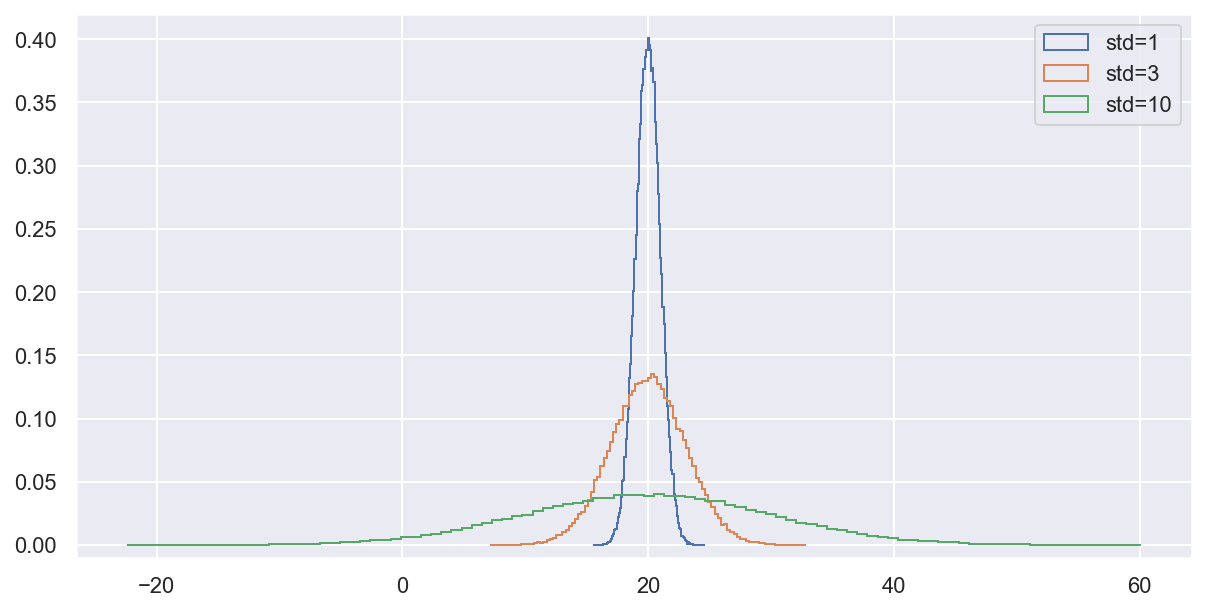

In [26]:
# Draw 100000 samples from Normal distribution
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Historgram
plt.figure(figsize=(10,5))
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Legend, set limits and show
plt.legend(('std=1', 'std=3', 'std=10'))
plt.ylim(-0.01, 0.42)
plt.show();

# Normal CDF

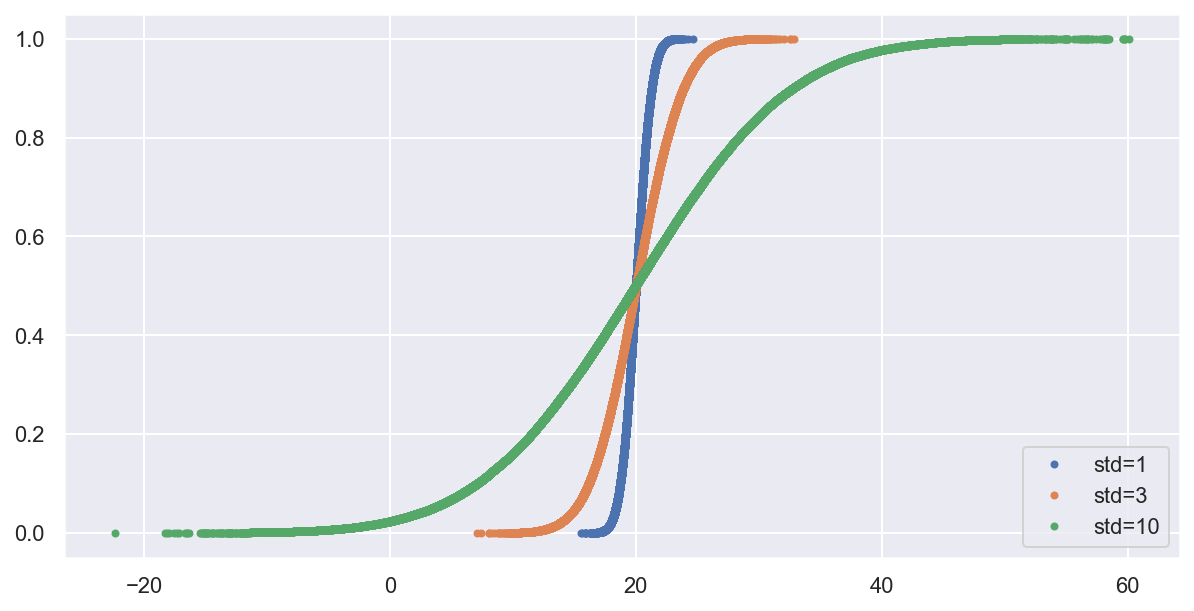

In [27]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot
plt.figure(figsize=(10,5))
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Legend
plt.legend(('std=1', 'std=3', 'std=10'), loc='lower right')
plt.show();

# Exponential Distribution

Describes the waiting time between rare events (Poisson process)

In [28]:
# Define a function that samples the waiting time for a no-hitter and a hit of the cycle
def successive_poisson(tau1, tau2, size=100000):
    """Compute time for arrival of 32 successive Poisson processes"""
    
    # Draw samples out of first exponential distribution
    t1 = np.random.exponential(tau1, size=100000)
    # Draw samples out of second exponential distribution
    t2 = np.random.exponential(tau2, size=100000)
    
    return t1 + t2

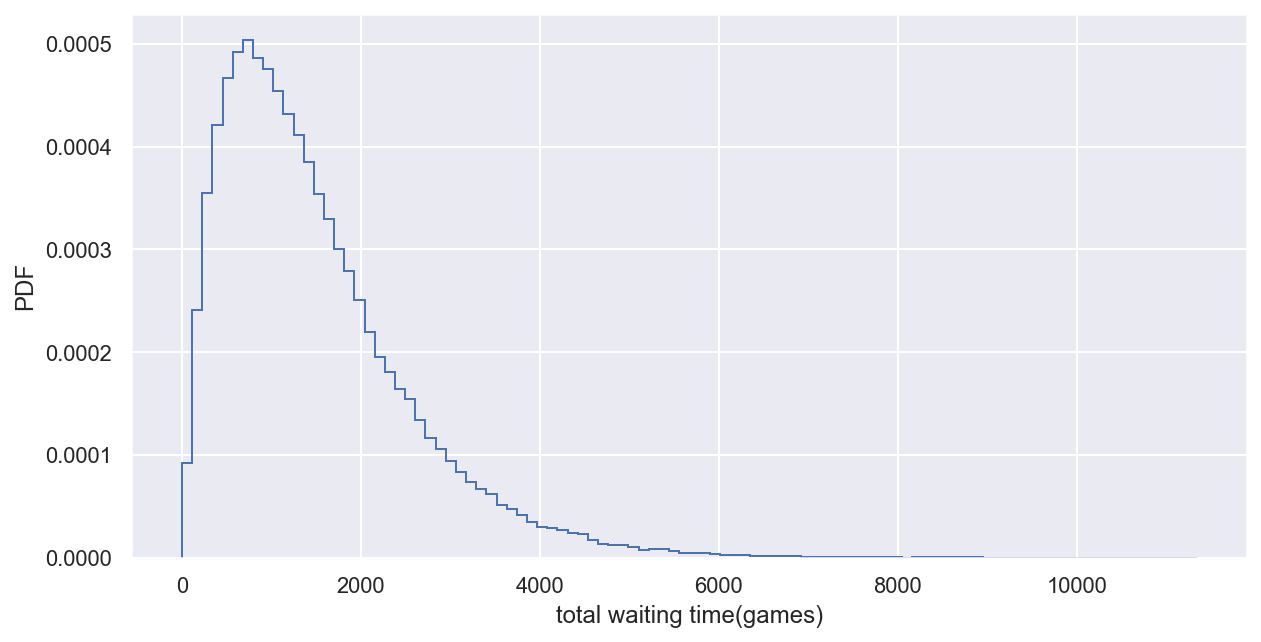

In [29]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Histogram
plt.figure(figsize=(10,5))
plt.hist(waiting_times, bins=100, histtype='step', density=True)

# Label
plt.xlabel('total waiting time(games)')
plt.ylabel('PDF')

# Show
plt.show();